In [18]:
# This notebook plots cumulative distribution functions for "scaled" convective environment parameter variability for each simulation and for continental and maritime simulations
# Import python libraries
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.gridspec as gridspec
import copy
import os

In [19]:
# Define colors for each simulation / case study
scolors = OrderedDict()
scolors['ARG1.1-R_old'] = 'darkorange'
scolors['ARG1.2-R'] = 'orange'
scolors['PHI2.1-R'] = 'darkviolet'
scolors['BRA1.2-R'] = 'gold'
scolors['AUS1.1-R'] = 'mediumorchid'
scolors['PHI1.1-R'] = 'mediumpurple'
scolors['PHI1.1-RPR'] = 'mediumpurple'
scolors['USA1.1-R'] = 'lightblue'
scolors['BRA1.1-R'] = 'yellowgreen'
scolors['BRA1.1-RPR'] = 'yellowgreen'
scolors['WPO1.1-R'] = 'dodgerblue'
scolors['DRC1.1-R'] = 'green'
scolors['DRC1.1-RCR'] = 'green'
scolors['RSA1.1-R'] = 'olivedrab'

In [20]:
# Define Convective Environment Parameters details
var = OrderedDict()
var[0] = OrderedDict()
var[0]['titlename'] = 'ML CIN'
var[0]['units'] = 'J/kg'
var[0]['varname'] = 'mlcin'
var[0]['varins'] = 'mlcins'
var[0]['varin'] = 'mlcin'
#var[0]['bins'] = np.arange(-300,0.1,2)
var[0]['bins'] = np.arange(0,500,2)
var[0]['sbins'] = np.arange(0,1.01,0.001)

var[1] = OrderedDict()
var[1]['titlename'] = 'ML CAPE'
var[1]['units'] = 'J/kg'
var[1]['varname'] = 'MLCAPE'
var[1]['varins'] = 'mlcapes'
var[1]['varin'] = 'mlcape'
var[1]['bins'] = np.arange(0,5001,20)
var[1]['sbins'] = np.arange(0,1.01,0.001)

var[2] = OrderedDict()
var[2]['titlename'] = 'Lowlevel Wind Shear'
var[2]['units'] = 'm/s'
var[2]['varname'] = 'Shear$_{low-level}$'
var[2]['varins'] = 'shr_lls'
var[2]['varin'] = 'shr_ll'
var[2]['bins'] =  np.arange(0,60,0.2)
var[2]['sbins'] = np.arange(0,1.01,0.001)

var[3] = OrderedDict()
var[3]['titlename'] = 'Midlevel Wind Shear'
var[3]['units'] = 'm/s'
var[3]['varname'] = 'Shear$_{mid-level}$'
var[3]['varins'] = 'shr_mls'
var[3]['varin'] = 'shr_ml'
var[3]['bins'] =  np.arange(0,60,0.2)
var[3]['sbins'] = np.arange(0,1.01,0.001)

var[4] = OrderedDict()
var[4]['titlename'] = 'Midlevel Relative Humidity'
var[4]['units'] = 'unitless'
var[4]['varname'] = 'RH$_{mid-level}$'
var[4]['varins'] = 'rh_mls'
var[4]['bins'] = np.arange(0.0,1.01,0.01)
var[4]['sbins'] = np.arange(0,1.01,0.001)

var[5] = OrderedDict()
var[5]['titlename'] = 'Lowlevel Relative Humidity'
var[5]['units'] = 'unitless'
var[5]['varname'] = 'RH$_{low-level}$'
var[5]['varins'] = 'rh_lls'
var[5]['bins'] = np.arange(0.0,1.01,0.01)
var[5]['sbins'] = np.arange(0,1.01,0.001)

var[6] = OrderedDict()
var[6]['titlename'] = 'Total Column Water Vapor'
var[6]['units'] = 'kg/m^2'
var[6]['varname'] = 'tcwv'
var[6]['varins'] = 'tcwvs'
var[6]['bins'] = np.arange(0,80.1,1)
var[6]['sbins'] = np.arange(0,1.01,0.001)

var[7] = OrderedDict()
var[7]['titlename'] = 'Total Column Condensate'
var[7]['units'] = 'kg/m^2'
var[7]['varname'] = 'tcwc'
var[7]['varins'] = 'tcwcs'
var[7]['bins'] = np.arange(0,100.1,1)
var[7]['sbins'] = np.arange(0,1.01,0.001)

var[8] = OrderedDict()
var[8]['titlename'] = 'Surface RH'
var[8]['units'] = 'unitless'
var[8]['varname'] = 'RH$_{surface}$'
var[8]['varins'] = 'rh_sfcs'
var[8]['bins'] = np.arange(0.0,1.11,0.01)
var[8]['sbins'] = np.arange(0,1.01,0.001)

var[9] = OrderedDict()
var[9]['titlename'] = '850hPa RH'
var[9]['units'] = 'unitless'
var[9]['varname'] = 'RH$_{850hPa}$'
var[9]['varins'] = 'rh_850s'
var[9]['bins'] = np.arange(0.0,1.11,0.01)
var[9]['sbins'] = np.arange(0,1.01,0.001)

var[10] = OrderedDict()
var[10]['titlename'] = '500hPa RH'
var[10]['units'] = 'unitless'
var[10]['varname'] = 'RH$_{500hPa}$'
var[10]['varins'] = 'rh_500s'
var[10]['bins'] = np.arange(0.0,1.11,0.01)
var[10]['sbins'] = np.arange(0,1.01,0.001)

var[11] = OrderedDict()
var[11]['titlename'] = '250hPa RH'
var[11]['units'] = 'unitless'
var[11]['varname'] = 'RH$_{250hPa}$'
var[11]['varins'] = 'rh_250s'
var[11]['bins'] = np.arange(0.0,1.11,0.01)
var[11]['sbins'] = np.arange(0,1.01,0.001)

var[12] = OrderedDict()
var[12]['titlename'] = 'Surface Temperature'
var[12]['units'] = 'K'
var[12]['varname'] = 'TEMP$_{surface}$'
var[12]['varins'] = 't_sfcs'
var[12]['bins'] = np.arange(0,350.1,0.1)
var[12]['sbins'] = np.arange(0,1.01,0.001)

var[13] = OrderedDict()
var[13]['titlename'] = '850 Temperature'
var[13]['units'] = 'K'
var[13]['varname'] = 'TEMP$_{850hPa}$'
var[13]['varins'] = 't_850s'
var[13]['bins'] = np.arange(0,600.1,0.1)
var[13]['sbins'] = np.arange(0,1.01,0.001)

var[14] = OrderedDict()
var[14]['titlename'] = '500 Temperature'
var[14]['units'] = 'K'
var[14]['varname'] = 'TEMP$_{500hPa}$'
var[14]['varins'] = 't_500s'
var[14]['bins'] = np.arange(0,600.1,0.1)
var[14]['sbins'] = np.arange(0,1.01,0.001)

var[15] = OrderedDict()
var[15]['titlename'] = '250 Temperature'
var[15]['units'] = 'K'
var[15]['varname'] = 'TEMP$_{250hPa}$'
var[15]['varins'] = 't_250s'
var[15]['bins'] = np.arange(0,600.1,0.1)
var[15]['sbins'] = np.arange(0,1.01,0.001)

var[16] = OrderedDict()
var[16]['titlename'] = 'Surface Winds'
var[16]['units'] = 'unitless'
var[16]['varname'] = 'SPD$_{surface}$'
var[16]['varins'] = 'spd_sfcs'
var[16]['bins'] = np.arange(0.0,50.1,0.5)
var[16]['sbins'] = np.arange(0,1.01,0.001)

var[17] = OrderedDict()
var[17]['titlename'] = '850hPa Winds'
var[17]['units'] = 'unitless'
var[17]['varname'] = 'SPD$_{850hPa}$'
var[17]['varins'] = 'spd_850s'
var[17]['bins'] = np.arange(0.0,50.1,0.5)
var[17]['sbins'] = np.arange(0,1.01,0.001)

var[18] = OrderedDict()
var[18]['titlename'] = '500hPa Winds'
var[18]['units'] = 'unitless'
var[18]['varname'] = 'SPD$_{500hPa}$'
var[18]['varins'] = 'spd_500s'
var[18]['bins'] = np.arange(0.0,50.1,0.5)
var[18]['sbins'] = np.arange(0,1.01,0.001)

var[19] = OrderedDict()
var[19]['titlename'] = '250hPa Winds'
var[19]['units'] = 'unitless'
var[19]['varname'] = 'SPD$_{250hPa}$'
var[19]['varins'] = 'spd_250s'
var[19]['bins'] = np.arange(0.0,50.1,0.5)
var[19]['sbins'] = np.arange(0,1.01,0.001)

var[20] = OrderedDict()
var[20]['titlename'] = 'Surface RV'
var[20]['units'] = 'unitless'
var[20]['varname'] = 'rvsfc'
var[20]['varins'] = 'rv_sfcs'
var[20]['bins'] = np.arange(0.0,0.02,0.001)
var[20]['sbins'] = np.arange(0,1.01,0.001)

var[21] = OrderedDict()
var[21]['titlename'] = '850hPa RV'
var[21]['units'] = 'unitless'
var[21]['varname'] = 'rv850'
var[21]['varins'] = 'rv_850s'
var[21]['bins'] = np.arange(0.0,0.02,0.001)
var[21]['sbins'] = np.arange(0,1.01,0.001)

var[22] = OrderedDict()
var[22]['titlename'] = '500hPa RV'
var[22]['units'] = 'unitless'
var[22]['varname'] = 'rv500'
var[22]['varins'] = 'rv_500s'
var[22]['bins'] = np.arange(0.0,0.02,0.001)
var[22]['sbins'] = np.arange(0,1.01,0.001)

var[23] = OrderedDict()
var[23]['titlename'] = '250hPa RV'
var[23]['units'] = 'unitless'
var[23]['varname'] = 'rv250'
var[23]['varins'] = 'rv_250s'
var[23]['bins'] = np.arange(0.0,0.02,0.001)
var[23]['sbins'] = np.arange(0,1.01,0.001)

var[24] = OrderedDict()
var[24]['titlename'] = 'MidLevel Lapse Rates'
var[24]['units'] = 'K/m'
var[24]['varname'] = 't_mllr'
var[24]['varins'] = 't_mllrs'
var[24]['bins'] = np.arange(0.5,10.,0.1)/10000
var[24]['sbins'] = np.arange(0,1.01,0.001)

# Added George Bryan Cape Code with two different mixed layer depths (500m, 1km)
var[25] = OrderedDict()
var[25]['titlename'] = 'ML CAPE (GB)'
var[25]['units'] = 'J/kg'
var[25]['varname'] = 'MLCAPE (500m)'
var[25]['varins'] = 'mlcapesGB'
var[25]['varin'] = 'mlcapeGB'
var[25]['bins'] = np.arange(0,5001,20)
var[25]['sbins'] = np.arange(0,1.01,0.001)

var[26] = OrderedDict()
var[26]['titlename'] = 'ML CAPE (GB1)'
var[26]['units'] = 'J/kg'
var[26]['varname'] = 'MLCAPE (1km)'
var[26]['varins'] = 'mlcapesGB1'
var[26]['varin'] = 'mlcapeGB1'
var[26]['bins'] = np.arange(0,5001,20)
var[26]['sbins'] = np.arange(0,1.01,0.001)

var[27] = OrderedDict()
var[27]['titlename'] = 'MU CAPE (GB)'
var[27]['units'] = 'J/kg'
var[27]['varname'] = 'MUCAPE'
var[27]['varins'] = 'mucapesGB'
var[27]['varin'] = 'mucapeGB1'
var[27]['bins'] = np.arange(0,5001,20)
var[27]['sbins'] = np.arange(0,1.01,0.001)

In [14]:
#cscrs = [0.1,0.01,0.001,0.0001,9999,0.00001]


In [21]:
savepath = '/tempest/pmarin/monsoon/ENV/Plots/Summary/'
savepathf = '/tempest/pmarin/monsoon/ENV/Plots/FINAL/'

plt.rcParams.update({'font.size': 13}) #Reset fontsize

scr_thr = 0.25 # % of reanalysis grid that must be condensate free to include in analysis
savepickpath = '/tempest/pmarin/monsoon/ENV/' # Where data is located
# Cloud condensate thresholds
cscrs = ['c0.1','c0.01','c0.001','c0.0001','c1e-05','c1e-06','c9999']
cc_now = [0,1,2,3,4,5,6]
ccs = ['-c','-b','-y','-o','-r','-m','-k']

#saveadds = '_all_100_120' # Later Time
#saveadd = '_all_200' # Initial Time (Shifted)
#saveadd = '_all_150' # Initial Time (Shifted)
#saveadd = '_all_100' # Initial Time 

saveadds = ['_all_100','_all_100_120'] # Both times, 27KM_AREA
saveaddf = '27KM'

#saveadds = ['_all_100_p15'] # 16KM_AREA
#saveaddf = '16KM'

# Grouping of cases (All Data, Continental, Maritime)
cases4 = [['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R'],
         ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','DRC1.1-R','RSA1.1-R'],
         ['AUS1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R']]

gs = 4 # Sub ERA5-Grid Spacing (4 = 729 1 km sized boxes)

# Create variable for various statistics 
cdata_all = OrderedDict()
data_save = OrderedDict()
data_cn = OrderedDict()
bins_all = OrderedDict()
stat_var = OrderedDict()

avg_save = OrderedDict()
std_save = OrderedDict()
ran_save = OrderedDict()
ske_save = OrderedDict()
kur_save = OrderedDict()
cnt_save = OrderedDict()
min_save = OrderedDict()
p01_save = OrderedDict()
p05_save = OrderedDict()
p95_save = OrderedDict()
p99_save = OrderedDict()
max_save = OrderedDict()
q1_save = OrderedDict()
q3_save = OrderedDict()
qcd_save = OrderedDict()
cd_save = OrderedDict()
stdmm_save = OrderedDict()
stdmma_save = OrderedDict()
stdp99_save = OrderedDict()
stdp95_save = OrderedDict()
stdp90_save = OrderedDict()
stdp75_save = OrderedDict()
cdmma_save = OrderedDict() 
qcdmma_save = OrderedDict()

# Loop through simulation groupings
for cccc in np.arange(0,len(cases4)):
    cases2 = cases4[cccc]
    print(cases2)
    # Loop through convective environment parameters
    for v in np.arange(0,len(var)):

        if v == 7:
            continue
        print(v)

        # Loop though cloud thresholds
        for cc in np.arange(0,len(cc_now)):
            ccc = cc_now[cc]

            stats = OrderedDict()
            # Loop through different times
            for ss in np.arange(0,len(saveadds)):
                pickfile = savepickpath+'Var_Stats_240205/Var_Stats_'+cscrs[ccc]+saveadds[ss]+'.p'
                print(pickfile)
                f = open(pickfile, 'rb')
                [avg_save[ss], std_save[ss], ran_save[ss], ske_save[ss], kur_save[ss], cnt_save[ss], min_save[ss], p01_save[ss], p05_save[ss], p95_save[ss], p99_save[ss], max_save[ss], q1_save[ss], q3_save[ss], qcd_save[ss], cd_save[ss], stdmm_save[ss], stdmma_save[ss], stdp99_save[ss], stdp95_save[ss], stdp90_save[ss], stdp75_save[ss], cdmma_save[ss], qcdmma_save[ss]] = pickle.load(f)
                f.close()    

                # XXX_save variable dimensions [casename,variable#][gs,]

                # Grab specific statistics of interest
                stlen = 11
                stats[ss,0] = stdmma_save[ss]
                binchange = 0
                statnames = ['Stand. Dev. (Min-Max Scaled)']
                stats[ss,1] = stdp99_save[ss]
                stats[ss,2] = stdp95_save[ss]
                stats[ss,3] = stdp90_save[ss]
                stats[ss,4] = stdp75_save[ss]
                stats[ss,5] = max_save[ss]
                stats[ss,6] = p99_save[ss]
                stats[ss,7] = p95_save[ss]
                stats[ss,8] = p05_save[ss]
                stats[ss,9] = p01_save[ss]
                stats[ss,10] = min_save[ss]
            
            #Loop through stats
            for st in np.arange(0,stlen):
                if st >= binchange:
                    bins_now = var[v]['sbins']
                else:
                    bins_now = var[v]['bins']

                hdata_all = np.zeros(len(bins_now))
                data_all = []
                cnt_all = []

                # Loop through cases in each grouping
                for c in np.arange(0,len(cases2)):
                    cn = cases2[c]
                    #print(cn)
                    datain = []
                    cntin = []
                    # Append data from all simulations and all times into one, big array
                    for ss in np.arange(0,len(saveadds)):
                        datain = np.append(datain,stats[ss,st][cn,v][gs,:])
                        cntin = np.append(cntin,cnt_save[ss][cn,v][gs,:])
                    #print(datain)
                    #print(cntin)
                    datain[cntin < scr_thr*729] = np.nan # Remove reanalysis areas with scr_thr% of area removed by condensate
                    #print(datain)
                    datain2 = datain
                    data_cn[cc,v,st,cn] = copy.deepcopy(datain2)
                    #datain2 = datain2[~np.isnan(datain2)]
                    data_all = np.append(data_all,datain2)
                    cnt_all = np.append(cnt_all,cntin)

                    # Create histogram for cumulative distributions
                    sampsize = len(datain2)
                    hdata,bins = np.histogram(datain2,bins=bins_now)
                    # Create cumulative distributions
                    hdata2 = np.insert(hdata,0,0)
                    hdata_all = hdata_all+hdata2
                    cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
                                
                #cccc = groupings, cc = condensate threshold, v = variable, st = stat
                data_save[cccc,cc,v,st] = copy.deepcopy(data_all)
                cdata_all[cccc,cc,v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all)      
                bins_all[cccc,cc,v,st] = bins


['ARG1.1-R_old', 'ARG1.2-R', 'BRA1.1-R', 'BRA1.2-R', 'AUS1.1-R', 'DRC1.1-R', 'PHI1.1-R', 'PHI2.1-R', 'WPO1.1-R', 'USA1.1-R', 'RSA1.1-R']
0
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.1_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.01_all_100_p15.p


/tmp/ipykernel_1773142/3142788603.py:142: RuntimeWarning: invalid value encountered in divide
  cdata = np.nancumsum(hdata2)/np.nansum(hdata2)


/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.0001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-05_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-06_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c9999_all_100_p15.p
1
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.1_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.01_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.0001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-05_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-06_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c9999_all_100_p15.p
2
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.1_all_100_p15.p
/tempest/pmar

/tmp/ipykernel_1773142/3142788603.py:146: RuntimeWarning: invalid value encountered in divide
  cdata_all[cccc,cc,v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all)


/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.0001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-05_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-06_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c9999_all_100_p15.p
4
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.1_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.01_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.0001_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-05_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c1e-06_all_100_p15.p
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c9999_all_100_p15.p
5
/tempest/pmarin/monsoon/ENV/Var_Stats_240205/Var_Stats_c0.1_all_100_p15.p
/tempest/pmar

In [22]:
# Get Mean Value over REanalysis Area (i.e. ERA5 value)

# Define variables
varE5 = OrderedDict()
varE5_cn = OrderedDict()

# Simulations cases and variables of interest
cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s','rh_500s','shr_lls','mucapesGB']

# Define Variables
for j in np.arange(0,len(varsin)):
    varE5[varsin[j]] = []
    varE5_cn[varsin[j]] = OrderedDict()
var_tcwc_cn = OrderedDict()
var_tcl_cn = OrderedDict()
saveadd = 'all_100'

# Loop through cases
for c in np.arange(0,len(cases2)):
#for c in np.arange(len(cases)-1,len(cases)):
    cn = cases2[c]
    print(cn)
    # Loop through times
    for ss in np.arange(0,len(saveadds)):
        savepath = '/tempest/pmarin/monsoon/ENV/'+cn+'/'+saveadds[ss][1:]+'/'
        if not os.path.exists(savepath):
            os.makedirs(savepath)
    
        
        # Lead Mean Value for ERA5 Grid Box
        Einfilename = savepath+cn+'_Environments_ERA5'+saveadds[ss]+'.p'
        # Load and Append Mean Convective Environmental Parameter Variables for Entire ERA5 Grid Box
        with open(Einfilename, 'rb') as f:
            evar = pickle.load(f) # Load environmental variable dictionary
            for j in np.arange(0,len(varsin)):
                varin = varsin[j]
                varE5[varin] = np.append(varE5[varin],evar[varin][cn])
                if ss == 0:
                    varE5_cn[varsin[j]][cn] = evar[varin][cn]
                else:
                    varE5_cn[varsin[j]][cn] = np.append(varE5_cn[varsin[j]][cn],evar[varin][cn])

ARG1.1-R_old
ARG1.2-R
BRA1.1-R
BRA1.2-R
AUS1.1-R
DRC1.1-R
PHI1.1-R
PHI2.1-R
WPO1.1-R
USA1.1-R
RSA1.1-R


spd_sfcs
[14.55600368 13.4517254  13.44235849] ARG1.1-R_old
[ 7.34686565  2.63153434 10.41238213] ARG1.1-R_old
[15.08251025] ARG1.2-R
[5.27288914] ARG1.2-R
[] BRA1.1-R
[] BRA1.1-R
[] BRA1.2-R
[] BRA1.2-R
[] DRC1.1-R
[] DRC1.1-R
[] RSA1.1-R
[] RSA1.1-R
Cont. (880 , 0.82)
Cont. (880 , 0.82)
[] AUS1.1-R
[] AUS1.1-R
[] PHI1.1-R
[] PHI1.1-R
[] PHI2.1-R
[] PHI2.1-R
[] WPO1.1-R
[] WPO1.1-R
[] USA1.1-R
[] USA1.1-R
Mari. (486 , 0.9)
Mari. (486 , 0.9)
mucapesGB
[] ARG1.1-R_old
[] ARG1.1-R_old
[] ARG1.2-R
[] ARG1.2-R
[] BRA1.1-R
[] BRA1.1-R
[] BRA1.2-R
[] BRA1.2-R
[] DRC1.1-R
[] DRC1.1-R
[] RSA1.1-R
[] RSA1.1-R
Cont. (843 , 0.94)
Cont. (843 , 0.94)
[] AUS1.1-R
[] AUS1.1-R
[] PHI1.1-R
[] PHI1.1-R
[] PHI2.1-R
[] PHI2.1-R
[] WPO1.1-R
[] WPO1.1-R
[] USA1.1-R
[] USA1.1-R
Mari. (413 , 0.96)
Mari. (413 , 0.96)
mlcapesGB
Cont. (843 , 0.96)
Cont. (843 , 0.96)
Mari. (413 , 0.96)
Mari. (413 , 0.96)
rh_500s
Cont. (833 , 0.91)
Cont. (833 , 0.91)
Mari. (413 , 0.93)
Mari. (413 , 0.93)


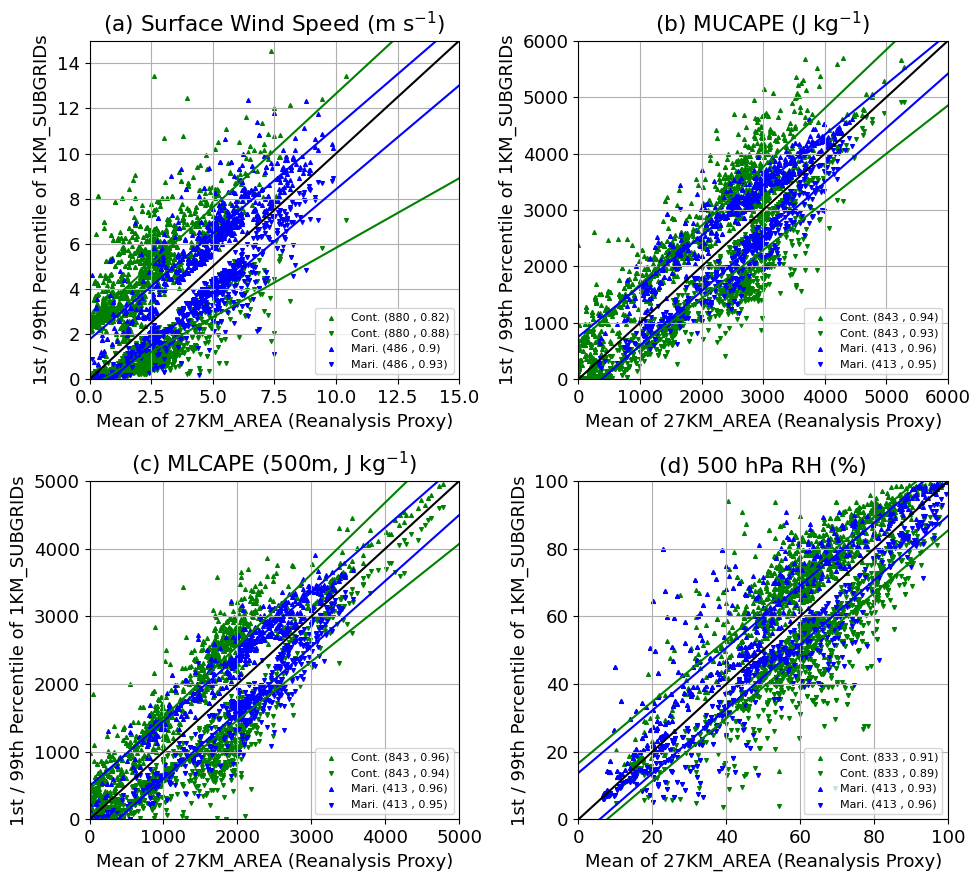

In [23]:
# Correlations Reanalyis Proxy with 1KM_SUBGRID Extemes
import scipy

# Groupings of Cases (Continental versus Maritime)
casesA = [['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','DRC1.1-R','RSA1.1-R'],
        ['AUS1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R']]

# Specific Convective Environment Parameters
vnames = ['spd_sfcs','mucapesGB','mlcapesGB','rh_500s']
vnames2 = ['(a) Surface Wind Speed (m s$^{-1}$)','(b) MUCAPE (J kg$^{-1}$)','(c) MLCAPE (500m, J kg$^{-1}$)','(d) 500 hPa RH (%)']
vs = [16,27,25,10]

scls = [15,6000,5000,100] #x Limits for Plotting
ms = 7 # Scatter plot marker size

statid1 = 6 # 99th percentile
statid2 = 9 # 1st percentile
saveaddf2 = '_0199'

#statid1 = 7 # 95th percentile
#statid2 = 8 # 5th percentile
#saveaddf2 = '_0595'

# Make Figure
fig,ax = plt.subplots(2,2,figsize=[10,9])
lcs = ['green','blue']
lbls = ['Cont.','Mari.']

cntv = 0
cntu = 0
# Loop through convective environmental parameters
for ii in np.arange(0,len(vs)):
    vname = vnames[ii]
    v = vs[ii]
    var1_sum = []
    var2_sum = []
    var3_sum = []
    var4_sum = []
    print(var[v]['varins'])
    #for c in np.arange(0,6):
    for c in np.arange(3,4): # Condensate Threshold = 3
        for ccc in np.arange(0,len(casesA)): # Loop through continental versus maritime
            cntc = 0
            cntcl = 0
            var1_sumc = [] # Reanalysis Proxy Continental
            var2_sumc = [] # 1KM_SUBGRID Extrema Continental
            var3_sumc = [] # Reanalysis Proxy Maritime
            var4_sumc = [] # 1KM_SUBGRID Extrema Maritime
            # Loop through cases in each sub group
            for cc in np.arange(0,len(casesA[ccc])): 
                cn = casesA[ccc][cc]
        #        var1 = var_tcwc_cn[cn]
                
                if ii == 3:
                    var1 = varE5_cn[vname][cn]*100 
                    var2 = data_cn[c,v,statid1,cn]*100
                    var3 = varE5_cn[vname][cn]*100 
                    var4 = data_cn[c,v,statid2,cn]*100
                else:
                    var1 = varE5_cn[vname][cn] # Reanalysis Proxy
                    var2 = data_cn[c,v,statid1,cn] # statistics 6 = 99th percentile
                    var3 = varE5_cn[vname][cn] # Reanalysis Proxy
                    var4 = data_cn[c,v,statid2,cn] # statistic 9 = 1st percentile
                    
                # Remove data from either reanalysis proxy or 1KM_subgrid extreme in the case that either was NAN
                var1 = var1[~np.isnan(var2)]
                var2 = var2[~np.isnan(var2)]        

                var2 = var2[~np.isnan(var1)]
                var1 = var1[~np.isnan(var1)]        

                var3 = var3[~np.isnan(var4)]
                var4 = var4[~np.isnan(var4)]        

                var4 = var4[~np.isnan(var3)]
                var3 = var3[~np.isnan(var3)]        
                
                # Find locations of extrema for discussion
                if cntu == 0 and cntv == 0:
                    j2 = np.where(var2 > 13)
                    for iiii in np.arange(0,len(j2)):
                        print(var2[j2[iiii]],cn) #Print Extrema
                        print(var1[j2[iiii]],cn) #Print Extrema

                # Find locations of extrema for discussion
                if cntu == 0 and cntv == 1:
                    j2 = np.where(var2 > 8000)
                    for iiii in np.arange(0,len(j2)):
                        print(var2[j2[iiii]],cn) #Print Extrema
                        print(var1[j2[iiii]],cn) #Print Extrema

                # Count sample size for 99th percentile (cntc) and 1st percentile (cntcl) for each case
                cntc = cntc + len(var1)
                cntcl = cntcl + len(var3)

                # Calculate correlation coefficient for 99th percentile (cntc) and 1st percentile (cntcl) for each case
                cc = np.corrcoef(var1,var2)[0,1]
                ccl = np.corrcoef(var3,var4)[0,1]
                
                # Append this case to all cases for this grouping
                var1_sumc = np.append(var1_sumc,var1)
                var2_sumc = np.append(var2_sumc,var2)
                var1_sum = np.append(var1_sum,var1)
                var2_sum = np.append(var2_sum,var2)

                var3_sumc = np.append(var3_sumc,var3)
                var4_sumc = np.append(var4_sumc,var4)
                var3_sum = np.append(var3_sum,var3)
                var4_sum = np.append(var4_sum,var4)

                #ax[cntv,cntu].scatter(var1,var2,c=scolors[cn],label=cn+'_'+str(int(len(var2)))+'_'+str(np.round(cc,2)))
                ax[cntu,cntv].scatter(var1,var2,c=lcs[ccc],s=ms,marker ="^") # Plot 99th percentile for each case
                ax[cntu,cntv].scatter(var3,var4,c=lcs[ccc],s=ms,marker ="v") # Plot 1st percentile for each case

            # Calculate correlation coefficents for entire grouping for 
            cc_sumc = np.corrcoef(var1_sumc,var2_sumc)[0,1] #99th percentile
            cc_sumcl = np.corrcoef(var3_sumc,var4_sumc)[0,1] #1st percentile

            # Calculate linear regression for entire grouping for 
            linreg = scipy.stats.linregress(var1_sumc,var2_sumc)  #99th percentile
            linregl = scipy.stats.linregress(var3_sumc,var4_sumc) #1st percentile
            
            # Labels
            leg_label = lbls[ccc]+' ('+str(int(cntc))+' , '+str(np.round(cc_sumc,2))+')'
            print(leg_label)
            leg_label_l = lbls[ccc]+' ('+str(int(cntcl))+' , '+str(np.round(cc_sumcl,2))+')'
            print(leg_label)

            # Plot data with labels
            ax[cntu,cntv].scatter(var1,var2,c=lcs[ccc],s=ms,marker ="^",label=leg_label)
            ax[cntu,cntv].scatter(var3,var4,c=lcs[ccc],s=ms,marker ="v",label=leg_label_l)
            x_arr = np.arange(0,scls[ii]+.1,(scls[ii]/10))
            ax[cntu,cntv].plot(x_arr,linreg.intercept+linreg.slope*x_arr,'-',c=lcs[ccc])
            ax[cntu,cntv].plot(x_arr,linregl.intercept+linregl.slope*x_arr,'-',c=lcs[ccc])

        cc_sum = np.corrcoef(var1_sum,var2_sum)[0,1]
        cc_suml = np.corrcoef(var3_sum,var4_sum)[0,1]

        # Plot 1-to-1 line
        ax[cntu,cntv].plot([0,scls[ii]],[0,scls[ii]],'-k')

        ax[cntu,cntv].set_xlim([0,scls[ii]])
        ax[cntu,cntv].set_ylim([0,scls[ii]])
        
        ax[cntu,cntv].set_xlabel('Mean of 27KM_AREA (Reanalysis Proxy)')
        ax[cntu,cntv].set_ylabel('1st / 99th Percentile of 1KM_SUBGRIDs')
        ax[cntu,cntv].set_title(vnames2[ii])
        #plt.xscale('log')
        ax[cntu,cntv].legend(fontsize=8,loc='lower right')
        ax[cntu,cntv].grid()
    cntv = cntv + 1
    if cntv == 2:
        cntu = cntu + 1
        cntv = 0
plt.tight_layout()
plt.savefig(savepathf+'Figure05'+saveaddf+saveaddf2+'.png')
plt.savefig(savepathf+'Figure05'+saveaddf+saveaddf2+'.pdf')

In [ ]:
## EXTRA / TEST Analyses

## 

In [ ]:
# Correlations between Variability Metric and Reanalysis-Mean Total Column Liquid

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['BRA1.1-R','DRC1.1-R','PHI1.1-R','WPO1.1-R','USA1.1-R']

vnames = ['rh_850s','rh_500s','mlcapesGB','spd_sfcs']
vs = [9,10,25,16]

#vname = 'rh_850s', # varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s']
#v = 9

#vname = 'mlcapesGB' # varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s']
#v = 25

st = 1
#st = 6 # 99th percentile
#st = 7 # 01th percentile


for ii in np.arange(0,len(vs)):
    vname = vnames[ii]
    v = vs[ii]
    var1_sum = []
    var2_sum = []
    print(var[v]['varins'])
    #for c in np.arange(0,6):
    for c in np.arange(3,4):
        plt.figure(figsize=[6,5])
        for cc in np.arange(0,len(cases2)):
            cn = cases2[cc]
    #        var1 = var_tcwc_cn[cn]
            var1 = varE5_cn[vname][cn] # Total Column Liquid
            var2 = data_cn[c,v,st,cn]

            var1 = var1[~np.isnan(var2)]
            var2 = var2[~np.isnan(var2)]        

            var1_sum = np.append(var1_sum,var1)
            var2_sum = np.append(var2_sum,var2)
            cc = np.corrcoef(var1,var2)[0,1]
            plt.scatter(var1,var2,c=scolors[cn],label=cn+'_'+str(int(len(var2)))+'_'+str(np.round(cc,2)))
            plt.xlabel('Mean Value ('+vname+')')
            plt.ylabel('Variability')
        cc_sum = np.corrcoef(var1_sum,var2_sum)[0,1]
        plt.title(cc_sum)
        #plt.xscale('log')
        plt.legend(fontsize=6)
        plt.grid()
        plt.ylim([0,0.22])
        
        

In [ ]:
# Correlations between Variability Metric and Reanalysis-Mean Total Column Liquid

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['BRA1.1-R','DRC1.1-R','PHI1.1-R','WPO1.1-R','USA1.1-R']

vnames = ['rh_850s','rh_500s','mlcapesGB','spd_sfcs']
vs = [9,10,25,16]

#vname = 'rh_850s', # varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s']
#v = 9

#vname = 'mlcapesGB' # varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s']
#v = 25

#st = 1
#st = 6 # 99th percentile
#st = 7 # 01th percentile

for ii in np.arange(0,len(vs)):
    vname = vnames[ii]
    v = vs[ii]
    var1_sum = []
    var2_sum = []
    print(var[v]['varins'])
    #for c in np.arange(0,6):
    for c in np.arange(3,4):
        plt.figure(figsize=[6,5])
        for cc in np.arange(0,len(cases2)):
            cn = cases2[cc]
    #        var1 = var_tcwc_cn[cn]
    #        var1 = varE5_cn[vname][cn] # Total Column Liquid
            var1 = data_cn[c,v,1,cn] # Total Column Liquid
            var2 = data_cn[c,v,6,cn]

            var1 = var1[~np.isnan(var2)]
            var2 = var2[~np.isnan(var2)]        

            var2 = var2[~np.isnan(var1)]
            var1 = var1[~np.isnan(var1)]        
            
            
            var1_sum = np.append(var1_sum,var1)
            var2_sum = np.append(var2_sum,var2)
            cc = np.corrcoef(var2,var1)[0,1]
            plt.scatter(var2,var1,c=scolors[cn],label=cn+'_'+str(int(len(var2)))+'_'+str(np.round(cc,2)))
            plt.xlabel('99th Percentile ('+vname+')')
            plt.ylabel('Variability (Scaled)')
        cc_sum = np.corrcoef(var2_sum,var1_sum)[0,1]
        plt.title(cc_sum)
        #plt.xscale('log')
        plt.legend(fontsize=7)
        plt.grid()

In [ ]:
# Correlations between Variability Metric and Reanalysis-Mean Total Column Liquid

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
vnames = ['rh_850s','rh_500s','mlcapesGB','spd_sfcs']
vs = [9,10,25,16]

for ii in np.arange(0,len(vs)):
    vname = vnames[ii]
    v = vs[ii]
    var1_sum = []
    var2_sum = []
    print(var[v]['varins'])
    #for c in np.arange(0,6):
    for c in np.arange(3,4):
        plt.figure(figsize=[6,5])
        for cc in np.arange(0,len(cases2)):
            cn = cases2[cc]
    #        var1 = var_tcwc_cn[cn]
            var1 = varE5_cn[vname][cn] # Total Column Liquid
            var2 = data_cn[c,v,6,cn]

            var1 = var1[~np.isnan(var2)]
            var2 = var2[~np.isnan(var2)]        

            var2 = var2[~np.isnan(var1)]
            var1 = var1[~np.isnan(var1)]        
            
            
            var1_sum = np.append(var1_sum,var1)
            var2_sum = np.append(var2_sum,var2)
            cc = np.corrcoef(var1,var2)[0,1]
            plt.scatter(var1,var2,c=scolors[cn],label=cn+'_'+str(int(len(var2)))+'_'+str(np.round(cc,2)))
            plt.xlabel('Reanalysis Area Mean ('+vname+')')
            plt.ylabel('99th Percentile')
        cc_sum = np.corrcoef(var1_sum,var2_sum)[0,1]
        plt.title(cc_sum)
        #plt.xscale('log')
        plt.legend(fontsize=7)
        plt.grid()

In [ ]:
# Correlations between Variability Metric and Reanalysis-Mean Total Column Liquid

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
vnames = ['rh_850s','rh_500s','mlcapesGB','spd_sfcs']
vs = [9,10,25,16]

for ii in np.arange(0,len(vs)):
    vname = vnames[ii]
    v = vs[ii]
    var1_sum = []
    var2_sum = []
    print(var[v]['varins'])
    #for c in np.arange(0,6):
    for c in np.arange(3,4):
        plt.figure(figsize=[6,5])
        for cc in np.arange(0,len(cases2)):
            cn = cases2[cc]
    #        var1 = var_tcwc_cn[cn]
            var1 = varE5_cn[vname][cn] # Total Column Liquid
            var2 = data_cn[c,v,7,cn]

            var1 = var1[~np.isnan(var2)]
            var2 = var2[~np.isnan(var2)]        

            var2 = var2[~np.isnan(var1)]
            var1 = var1[~np.isnan(var1)]        
            
            
            var1_sum = np.append(var1_sum,var1)
            var2_sum = np.append(var2_sum,var2)
            cc = np.corrcoef(var1,var2)[0,1]
            plt.scatter(var1,var2,c=scolors[cn],label=cn+'_'+str(int(len(var2)))+'_'+str(np.round(cc,2)))
            plt.xlabel('Reanalysis Area Mean ('+vname+')')
            plt.ylabel('1st Percentile')
        cc_sum = np.corrcoef(var1_sum,var2_sum)[0,1]
        plt.title(cc_sum)
        #plt.xscale('log')
        plt.legend(fontsize=7)
        plt.grid()

In [ ]:
# Correlations between Variability Metric and Reanalysis-Mean Total Column Liquid

cases2 = ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']
#cases2 = ['BRA1.1-R','DRC1.1-R','PHI1.1-R','WPO1.1-R','USA1.1-R']
vname = 'rh_850s' # varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s']
v = 9

vname = 'mlcapesGB' # varsin = ['tcwcs','tcls','tcwvs','spd_sfcs','mlcapesGB','rh_850s']
v = 25

var1_sum = []
var2_sum = []
st = 1
print(var[v]['varins'])
#for c in np.arange(0,6):
for c in np.arange(3,4):
    plt.figure()
    for cc in np.arange(0,len(cases2)):
        cn = cases2[cc]
#        var1 = var_tcwc_cn[cn]
        var1 = varE5_cn[vname][cn] # Total Column Liquid
        var2 = data_cn[c,v,st,cn]

        var1 = var1[~np.isnan(var2)]
        var2 = var2[~np.isnan(var2)]        
        
        var1_sum = np.append(var1_sum,var1)
        var2_sum = np.append(var2_sum,var2)
        cc = np.corrcoef(var1,var2)[0,1]
        plt.scatter(var1,var2,c=scolors[cn],label=cn+'_'+str(int(len(var2)))+'_'+str(np.round(cc,2)))
        plt.xlabel('Mean Value')
        plt.ylabel('Variability')
    cc_sum = np.corrcoef(var1_sum,var2_sum)[0,1]
    plt.title(cc_sum)
    #plt.xscale('log')
    plt.legend(fontsize=7)

In [ ]:
for c in np.arange(0,6):
    var1 = var_tcwc
    var2 = data_save[c,9,0]
    cc = np.corrcoef(var1,var2)[0,1]
    plt.figure()
    plt.scatter(var1,var2)
    plt.xlabel('Mean Integrated Total Condensate')
    plt.ylabel('Variability')
    plt.title(cc)
    plt.xscale('log')

In [ ]:
# Print % Decrease when eliminate clouds
val_arr = []
for v in np.arange(0,len(var)-4):
    if v == 7:
        continue
    if (stat_var[0.5,2,v,st]-stat_var[0.5,5,v,st]) == 0:
        continue
    else:
        val_arr = np.append(val_arr,(stat_var[0.5,2,v,st]-stat_var[0.5,5,v,st])/stat_var[0.5,5,v,st])
        print(var[v]['titlename'])
        print((stat_var[0.5,2,v,st]-stat_var[0.5,5,v,st])/stat_var[0.5,5,v,st])


In [ ]:
cccc = 0
cc = 5
ax = OrderedDict()
fig = plt.figure(figsize=[15,12])
gs = fig.add_gridspec(2, 9)
ax[0] = fig.add_subplot(gs[0, 0:4])
ax[1] = fig.add_subplot(gs[0, 5:9])
ax[2] = fig.add_subplot(gs[1, 0:4])
ax[3] = fig.add_subplot(gs[1, 5:7])
ax[4] = fig.add_subplot(gs[1, 8])

dids = [[8,9,10,11],
        [12,13,14,15],
        [16,17,18,19],
        [2,3],
        [1]]

ttls = ['Relative Humidity (%)','Temperature (K)','Wind Speed (m s$^{-1}$)','Wind Shear (m s$^{-1}$)','MLCAPE (J kg$^{-1}$)']
xlbls = [['','','Surf','','850 hPa','','500 hPa','','250 hPa'],
         ['','','Surf','','850 hPa','','500 hPa','','250 hPa'],
         ['','','Surf','','850 hPa','','500 hPa','','250 hPa'],
         ['','Low-Level','','Mid-Level'],
         ['','','Mixed-Layer']]
for i in np.arange(0,np.shape(dids)[0]):
    data_p=[]
    for j in np.arange(0,np.shape(dids[i])[0]):
        data_p.append(list(data_save[cccc,cc,dids[i][j],0]))

In [ ]:
cccc = 0
cc = 5
ax = OrderedDict()
fig = plt.figure(figsize=[15,12])
gs = fig.add_gridspec(2, 9)
ax[0] = fig.add_subplot(gs[0, 0:4])
ax[1] = fig.add_subplot(gs[0, 5:9])
ax[2] = fig.add_subplot(gs[1, 0:4])
ax[3] = fig.add_subplot(gs[1, 5:7])
ax[4] = fig.add_subplot(gs[1, 8])

dids = [[8,9,10,11],
        [12,13,14,15],
        [16,17,18,19],
        [2,3],
        [1]]

ttls = ['Relative Humidity (%)','Temperature (K)','Wind Speed (m s$^{-1}$)','Wind Shear (m s$^{-1}$)','MLCAPE (J kg$^{-1}$)']
xlbls = [['','','Surf','','850 hPa','','500 hPa','','250 hPa'],
         ['','','Surf','','850 hPa','','500 hPa','','250 hPa'],
         ['','','Surf','','850 hPa','','500 hPa','','250 hPa'],
         ['','Low-Level','','Mid-Level'],
         ['','','Mixed-Layer']]
for i in np.arange(0,np.shape(dids)[0]):
    data_p=[]
    for j in np.arange(0,np.shape(dids[i])[0]):
        data_p.append(list(data_save[cccc,cc,dids[i][j],0]))
    
    print(np.shape(data_p))
    violin = ax[i].violinplot(data_p,
               points=500, widths=0.7, showmedians=True, 
               quantiles=np.tile([0.25,0.75],(np.shape(dids[i])[0],1)).tolist(), 
               bw_method=0.5)
    ax[i].set_title(ttls[i])
    ax[i].set_ylabel('Range')
    ax[i].set_xticklabels(xlbls[i])
    ax[i].grid()
    violin['cmedians'].set_edgecolor("orangered")
    violin['cmedians'].set_linewidth(3)
    violin['cquantiles'].set_edgecolor("orchid")
    violin['cquantiles'].set_linewidth(3)



In [ ]:
np.tile([0.25,0.75],(np.shape(dids[i])[0],1)).tolist()

In [ ]:
cccc = 0
ccs = [5,4]
ax = OrderedDict()
fig = plt.figure(figsize=[15,12])
gs = fig.add_gridspec(2, 9)
ax[0] = fig.add_subplot(gs[0, 0:4])
ax[1] = fig.add_subplot(gs[0, 5:9])
ax[2] = fig.add_subplot(gs[1, 0:4])
ax[3] = fig.add_subplot(gs[1, 5:7])
ax[4] = fig.add_subplot(gs[1, 8])

dids = [[8,9,10,11],
        [12,13,14,15],
        [16,17,18,19],
        [2,3],
        [1]]

ttls = ['Relative Humidity (%)','Temperature (K)','Wind Speed (m s$^{-1}$)','Wind Shear (m s$^{-1}$)','MLCAPE (J kg$^{-1}$)']
xlbls = [['','Surf','Surf \n (no cld)','850','850 \n (no cld)','500','500 \n (no cld)','250','250 \n (no cld)'],
         ['','Surf','Surf \n (no cld)','850','850 \n (no cld)','500','500 \n (no cld)','250','250 \n (no cld)'],
         ['','Surf','Surf \n (no cld)','850','850 \n (no cld)','500','500 \n (no cld)','250','250 \n (no cld)'],
         ['','Low','Low \n (no cld)','Mid','Mid \n (no cld)'],
         ['','MLCAPE','MLCAPE \n (no cld)']]

for i in np.arange(0,np.shape(dids)[0]):
    data_p=[]
    for j in np.arange(0,np.shape(dids[i])[0]):
        for cc in ccs:
            data_list = data_save[cccc,cc,dids[i][j],0]
            data_list = data_list[~np.isnan(data_list)]
            data_p.append(list(data_list))
    
    print(np.shape(data_p))
    violin = ax[i].violinplot(data_p,
               points=500, widths=0.7, showmedians=True, 
               quantiles=np.tile([0.25,0.75],(len(data_p),1)).tolist(), 
               bw_method=0.5)
    ax[i].set_title(ttls[i])
    ax[i].set_ylabel('Range')
    ax[i].set_xticks(np.arange(0,len(data_p)+1))
    ax[i].set_xticklabels(xlbls[i])
    ax[i].grid()
    
    cntpc = 0
    for pc in violin["bodies"]:
        if cntpc == 1 or cntpc == 3 or cntpc == 5 or cntpc == 7:
            pc.set_facecolor("green")
            pc.set_edgecolor("black")
            pc.set_alpha(0.5)
        cntpc = cntpc+1
        
    violin['cmedians'].set_edgecolor("red")
    violin['cmedians'].set_linewidth(3)
    violin['cquantiles'].set_edgecolor("magenta")
    violin['cquantiles'].set_linewidth(3)
#plt.tight_layout()


In [ ]:
cccc = 0
ccs = [5,4]
dids = [[8,9,10,11],
        [12,13,14,15],
        [16,17,18,19],
        [2,3],
        [1]]

save_pct_chg = []
for i in np.arange(0,np.shape(dids)[0]):
    data_p=[]
    for j in np.arange(0,np.shape(dids[i])[0]):
        cnt_cc = 0
        med_val = np.zeros(len(ccs))
        for cc in ccs:
            data_list = data_save[cccc,cc,dids[i][j],0]
            med_val[cnt_cc] = np.nanmedian(data_list)
            data_list = data_list[~np.isnan(data_list)]
            data_p.append(list(data_list))
            cnt_cc = cnt_cc + 1
        print(med_val[0],med_val[1],(med_val[1]-med_val[0])/med_val[0]*100)
        save_pct_chg.append((med_val[1]-med_val[0])/med_val[0]*100)
    

In [ ]:
cccc = 0
ccs = [5,4]
dids = [[10]]

save_pct_chg = []
for i in np.arange(0,np.shape(dids)[0]):
    data_p=[]
    for j in np.arange(0,np.shape(dids[i])[0]):
        cnt_cc = 0
        for cc in ccs:
            data_list = data_save[cccc,cc,dids[i][j],0]
            data_list = data_list[~np.isnan(data_list)]
            data_p.append(list(data_list))
            cnt_cc = cnt_cc + 1
print(np.nanmedian(data_list))
print(np.nanpercentile(data_list,50))
print(np.nanpercentile(data_list,25))
print(np.nanpercentile(data_list,75))


In [ ]:
print(np.nanmedian(data_list))
